In [37]:
import tensorflow as tf
from matplotlib import pyplot as plt

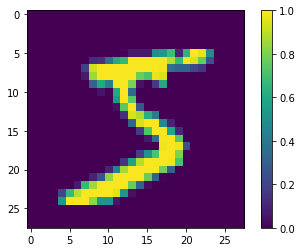

In [38]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

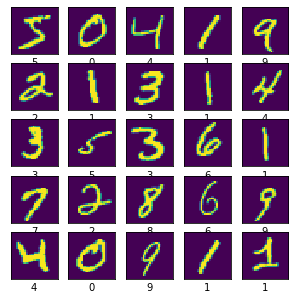

In [39]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)]
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2976 - acc: 0.9120
Epoch 2/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.1456 - acc: 0.9574
Epoch 3/5
60000/60000 [==============================] - 15s 255us/sample - loss: 0.1093 - acc: 0.9665
Epoch 4/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0883 - acc: 0.9726
Epoch 5/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0782 - acc: 0.9748


In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 103us/sample - loss: 0.0770 - acc: 0.9756


[0.07701893289838918, 0.9756]

In [43]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0770 - acc: 0.9756


[0.07701893289838918, 0.9756]

(1, 28, 28)

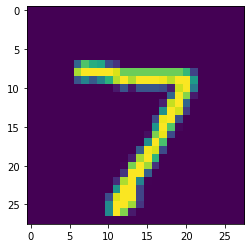

In [44]:
import numpy as np
plt.imshow(x_test[0])
img = np.expand_dims(x_test[0],0)
img.shape

In [45]:
np.argmax(model.predict(img))

7